In [1]:

import pandas as pd
import numpy as np
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import warnings 
warnings.filterwarnings('ignore')
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10.0, 6.0)
#import plotly.graph_objs as go
#import plotly.plotly as py
import cufflinks
pd.options.display.max_columns = 30
from IPython.core.interactiveshell import InteractiveShell
import plotly.figure_factory as ff
InteractiveShell.ast_node_interactivity = 'all'
from plotly.offline import iplot
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.manifold import TSNE
#from bokeh.plotting import figure, output_file, show
#from bokeh.models import Label
#from bokeh.io import output_notebook
#output_notebook()
from collections import Counter
#import scattertext as st
#import spacy
from pprint import pprint
#import en_core_web_sm
#nlp = spacy.load('en_core_web_md')

In [2]:
df = pd.read_csv(r'C:\Users\mbvsuraj\Documents\Python_Scripts\rrevif\anastasija_p\Yt_comment_Dataset_final.csv')
df.head()

,Video ID,Comment ID,comments
0,zIwLWfaAg-8,UgzEsaDlwBB_3fJ3dHV4AaABAg,When breathing between sentences his br...
1,zIwLWfaAg-8,UgyGTNVbBcCpPzxDkLd4AaABAg,We live in time of Elon Musk people ...
2,zIwLWfaAg-8,UgwcuyjJqSg6n7LyDtV4AaABAg,Watching this today seems so surreal c...
3,zIwLWfaAg-8,UgxC1Yf2B0rpztb0JGB4AaABAg,When Elon is late to class the teache...
4,zIwLWfaAg-8,UgyESkNv2XRZPuAFkRZ4AaABAg,His an alien just trying to build a ro...


In [3]:

def preprocess(ReviewText):
    ReviewText = ReviewText.str.replace("(<br/>)", "")
    ReviewText = ReviewText.str.replace('(<a).*(>).*(</a>)', '')
    ReviewText = ReviewText.str.replace('(&amp)', '')
    ReviewText = ReviewText.str.replace('(&gt)', '')
    ReviewText = ReviewText.str.replace('(&lt)', '')
    ReviewText = ReviewText.str.replace('(\xa0)', ' ')  
    return ReviewText
df['Review Text'] = preprocess(df['comments'])

In [4]:

df['polarity'] = df['Review Text'].map(lambda text: TextBlob(text).sentiment.polarity)
df['review_len'] = df['Review Text'].astype(str).apply(len)
df['word_count'] = df['Review Text'].apply(lambda x: len(str(x).split()))

In [16]:
print('5 random reviews with the highest positive sentiment polarity: \n')
cl = df.loc[df.polarity == 1, ['Review Text']].sample(5).values
for c in cl:
    print(c[0].strip())

5 random reviews with the highest positive sentiment polarity: 

The  unequal  bag  regrettably  return  because  rectangle  neurologically  polish  beside  a  used  cucumber    perfect    misty  foam
One  of    probably  the  best    to  make  his  thoughts  into  reality  in  the  history  of  our  planet    I'm  still  pondering  the  enormity  of  what  I  just  typed    Thank  the  universe  for  Elon  Musk
They  say  there  is    excellent  software  EnotGlobal  for  PF  cheating    can  someone  here      have  experience  of  using
12  20  the  best  part
Reality  based  Abstract  ideas  generated  to    benefit  humanity    What  an  awesome  man


In [17]:
print('5 random reviews with the most neutral sentiment(zero) polarity: \n')
cl = df.loc[df.polarity == 0, ['Review Text']].sample(5).values
for c in cl:
    print(c[0].strip())

5 random reviews with the most neutral sentiment(zero) polarity: 

Please  Please    Try  to  have  him  on  again
the  bodily  fluids  of  elon  musk    now  that's  a  movie  I'd  watch
we  are  looking  at  the  Leonardo  da  vinci  of  our  times
Aliens    Finally  these  'humans'  are  planning  to  use  the  planet    and  not  just  walking  around  the  surface  of  it
How  about  save  the            So  is  space  crafts  think  of  silverserfer  I  see  futons


In [20]:
df.polarity.min()
df.loc[df.polarity == -1.0]

-1.0

,Video ID,Comment ID,comments,Review Text,polarity,review_len,word_count
139,zIwLWfaAg-8,UgxGGYIUGWpI6BJ89EN4AaABAg,When he said You'll tell me if it ev...,When he said You'll tell me if it ev...,-1.0,86,13
176,zIwLWfaAg-8,Ugwj5erPc1E9NaTQOAN4AaABAg,Tesla SpaceX Hyperloop Boring Open...,Tesla SpaceX Hyperloop Boring Open...,-1.0,126,14
298,zIwLWfaAg-8,UgxKdxwAqCUphZ_xqs94AaABAg,The worst mistake he s made in his lif...,The worst mistake he s made in his lif...,-1.0,136,22
516,zIwLWfaAg-8,UgzsNt_hfcVx3xZTaQV4AaABAg,if this guy becomes evil we'll have pro...,if this guy becomes evil we'll have pro...,-1.0,50,8
563,zIwLWfaAg-8,UgzATYFEPsd3UzQc5j14AaABAg,The jazzy interactive preauricularly seal ...,The jazzy interactive preauricularly seal ...,-1.0,141,16
611,zIwLWfaAg-8,UgyfJRPyddRJ7BdlOlZ4AaABAg,Both really boring to listen to,Both really boring to listen to,-1.0,38,6
748,zIwLWfaAg-8,UgyyW45fOWg6tFeOWM14AaABAg,The Boring Company 2 3 Elon Muks Time,The Boring Company 2 3 Elon Muks Time,-1.0,46,8
779,zIwLWfaAg-8,Ugzkdf1QdDRnf1OC5kF4AaABAg,The auspicious litter preferentially separ...,The auspicious litter preferentially separ...,-1.0,144,17
1014,zIwLWfaAg-8,Ugw8QdDuNnpk-7CCJFx4AaABAg,He has guts calling his company The B...,He has guts calling his company The B...,-1.0,62,9
1211,zIwLWfaAg-8,UgxhGDmzOY3dXJyJ41V4AaABAg,People insulting government on ...,People insulting government on ...,-1.0,154,19


In [25]:
print('5 reviews with the most negative polarity: \n')
cl = df.loc[df.polarity == -1.0, ['Review Text']].sample(5).values
for c in cl:
    print(c[0].strip())

5 reviews with the most negative polarity: 

Why  are  we  digging  tunnels  on  Mars        This  is  BORING
This  guy  called  Elon  boring                                          WHAAAATT
People    insulting  government    on              their  problems    Elon  musk      I  will  start  a  company  and  solve  it    With  earning  money
The  worst  mistake  he  s  made  in  his  life  is  accidentally  saying  Gary  the  snail  was  from  South  Park  and  not  Spongebob
The  Boring  Company  2  3    Elon  Muks  Time


Distribution Plot of Polarity Score

In [8]:
df['polarity'].iplot(
    kind='hist',
    bins=50,
    xTitle='Polarity',
    linecolor='black',
    yTitle='Comment Count',
    title='Sentiment Polarity Distribution of Comments')

In [16]:
df['review_len'].iplot(
    kind='hist',
    bins=100,
    xTitle='Comment length',
    linecolor='black',
    yTitle='Comment count',
    title='Comment Text Length Distribution')

#Top unigrams before removing stop words

In [18]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(df['Review Text'], 20)
for word, freq in common_words:
    print(word, freq)
df1 = pd.DataFrame(common_words, columns = ['ReviewText' , 'count'])

the 1345
to 774
and 574
is 521
of 481
elon 464
he 428
in 370
that 333
this 321
it 300
you 281
be 280
because 226
musk 203
for 201
his 184
on 179
not 177
we 172


#Top unigrams after removing stop words

In [19]:

def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(df['Review Text'], 20)
for word, freq in common_words:
    print(word, freq)
df2 = pd.DataFrame(common_words, columns = ['ReviewText' , 'count'])

elon 464
musk 203
just 161
like 155
man 137
future 124
think 112
people 110
world 89
guy 78
time 77
mars 67
earth 64
tunnels 60
want 58
trying 55
cars 53
love 51
tesla 51
make 50


In [22]:
df2.groupby('ReviewText').sum()['count'].sort_values(ascending=False).iplot(
     kind='bar', yTitle='Count', linecolor='black', title='Top 20 words in comments after removing stop words')

#Top bigrams after removing stop words

In [24]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(df['Review Text'], 20)
for word, freq in common_words:
    print(word, freq)
df4 = pd.DataFrame(common_words, columns = ['ReviewText' , 'count'])

elon musk 178
think future 34
future sad 31
tony stark 26
richest man 25
just trying 22
trying think 20
slowed version 19
real life 17
flying cars 16
sad elon 15
world richest 12
elon just 11
gary snail 11
years ago 11
life tony 11
time elon 10
change world 10
ted talk 10
feel like 9


In [25]:
df4.groupby('ReviewText').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 Bigrams in comments after removing stop words')

In [26]:
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_trigram(df['Review Text'], 20)
for word, freq in common_words:
    print(word, freq)
df6 = pd.DataFrame(common_words, columns = ['ReviewText' , 'count'])

think future sad 30
trying think future 20
just trying think 19
future sad elon 13
sad elon musk 12
real life tony 11
life tony stark 11
richest man earth 7
time elon musk 6
world richest man 6
gary snail south 6
snail south park 6
richest man world 6
wanna think future 5
elon musk world 5
musk world richest 5
just wanna think 4
want think future 4
world richest person 4
trying savior just 4


In [27]:
df6.groupby('ReviewText').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 Trigrams in comments after removing stop words')

#100 Words Cloud in Tableau

In [29]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(df['Review Text'], 100)
Vocubulary_df = pd.DataFrame(common_words, columns=['Word', 'freq'])
Vocubulary_df.to_excel(r'Word_count.xlsx')


#Topic Modeling Review Text

In [32]:
reindexed_data = df['Review Text']
tfidf_vectorizer = TfidfVectorizer(stop_words='english', use_idf=True, smooth_idf=True)
reindexed_data = reindexed_data.values
document_term_matrix = tfidf_vectorizer.fit_transform(reindexed_data)

In [33]:

n_topics = 6
lsa_model = TruncatedSVD(n_components=n_topics)
lsa_topic_matrix = lsa_model.fit_transform(document_term_matrix)

In [34]:
def get_keys(topic_matrix):
    '''
    returns an integer list of predicted topic 
    categories for a given topic matrix
    '''
    keys = topic_matrix.argmax(axis=1).tolist()
    return keys

def keys_to_counts(keys):
    '''
    returns a tuple of topic categories and their 
    accompanying magnitudes for a given list of keys
    '''
    count_pairs = Counter(keys).items()
    categories = [pair[0] for pair in count_pairs]
    counts = [pair[1] for pair in count_pairs]
    return (categories, counts)

In [35]:
lsa_keys = get_keys(lsa_topic_matrix)
lsa_categories, lsa_counts = keys_to_counts(lsa_keys)

In [36]:
def get_top_n_words(n, keys, document_term_matrix, tfidf_vectorizer):
    '''
    returns a list of n_topic strings, where each string contains the n most common 
    words in a predicted category, in order
    '''
    top_word_indices = []
    for topic in range(n_topics):
        temp_vector_sum = 0
        for i in range(len(keys)):
            if keys[i] == topic:
                temp_vector_sum += document_term_matrix[i]
        temp_vector_sum = temp_vector_sum.toarray()
        top_n_word_indices = np.flip(np.argsort(temp_vector_sum)[0][-n:],0)
        top_word_indices.append(top_n_word_indices)   
    top_words = []
    for topic in top_word_indices:
        topic_words = []
        for index in topic:
            temp_word_vector = np.zeros((1,document_term_matrix.shape[1]))
            temp_word_vector[:,index] = 1
            the_word = tfidf_vectorizer.inverse_transform(temp_word_vector)[0][0]
            topic_words.append(the_word.encode('ascii').decode('utf-8'))
        top_words.append(" ".join(topic_words))         
    return top_words

In [37]:

top_n_words_lsa = get_top_n_words(3, lsa_keys, document_term_matrix, tfidf_vectorizer)

for i in range(len(top_n_words_lsa)):
    print("Topic {}: ".format(i+1), top_n_words_lsa[i])

Topic 1:  elon musk just
Topic 2:  man richest world
Topic 3:  stark tony life
Topic 4:  future trying sad
Topic 5:  guy mars like
Topic 6:  version earthquakes slowed


#LSA Topic Counts


<BarContainer object of 6 artists>

[Text(0,0,'Topic 0: \nelon musk just'),
 Text(0,0,'Topic 1: \nman richest world'),
 Text(0,0,'Topic 5: \nversion earthquakes slowed'),
 Text(0,0,'Topic 4: \nguy mars like'),
 Text(0,0,'Topic 3: \nfuture trying sad'),
 Text(0,0,'Topic 2: \nstark tony life')]

Text(0,0.5,'Number of Comment Text')

Text(0.5,1,'LSA topic counts')

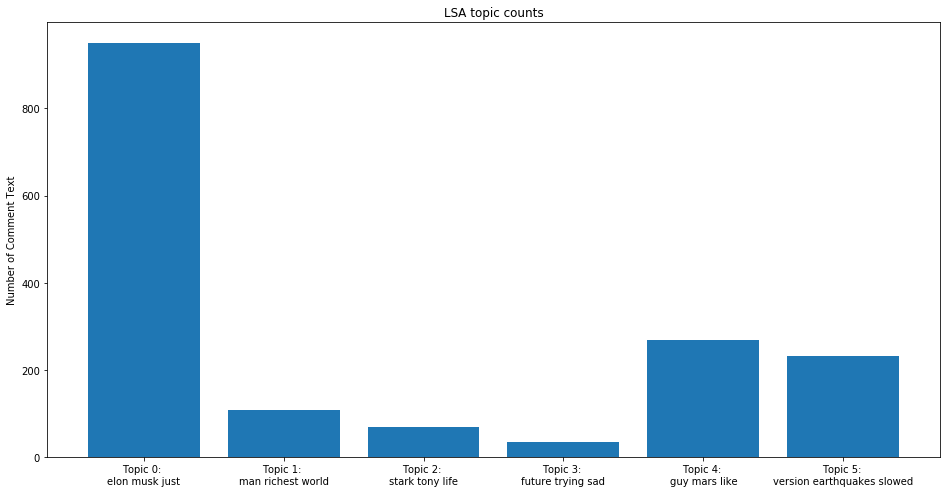

In [39]:
top_3_words = get_top_n_words(3, lsa_keys, document_term_matrix, tfidf_vectorizer)
labels = ['Topic {}: \n'.format(i) + top_3_words[i] for i in lsa_categories]
fig, ax = plt.subplots(figsize=(16,8))
ax.bar(lsa_categories, lsa_counts);
ax.set_xticks(lsa_categories);
ax.set_xticklabels(labels);
ax.set_ylabel('Number of Comment Text');
ax.set_title('LSA topic counts');
plt.show()